Lets get an overview.
[[ 1.00000000e+00  1.03108330e-06 -1.31943170e-06]
 [ 1.00000000e+00 -4.41892843e-07 -2.93207044e-07]
 [ 1.00000000e+00  0.00000000e+00 -1.46603522e-07]
 ...
 [ 6.00000000e+02 -1.17837940e-07 -2.63886270e-07]
 [ 6.00000000e+02 -1.32567683e-07 -3.22527664e-07]
 [ 6.00000000e+02 -1.76756910e-07 -2.63886270e-07]]


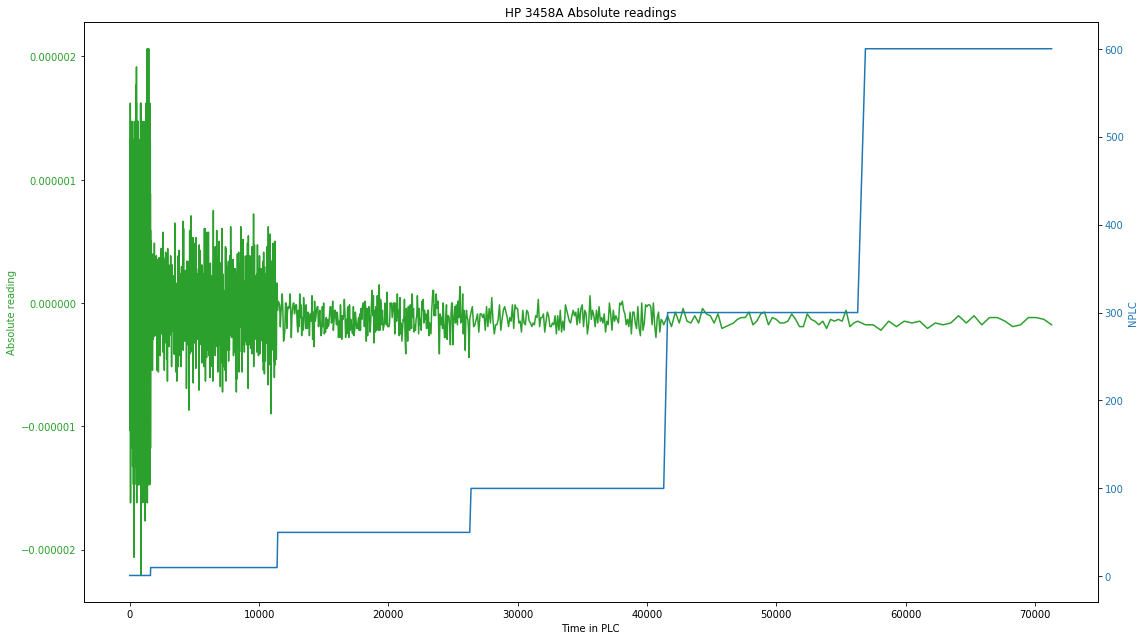

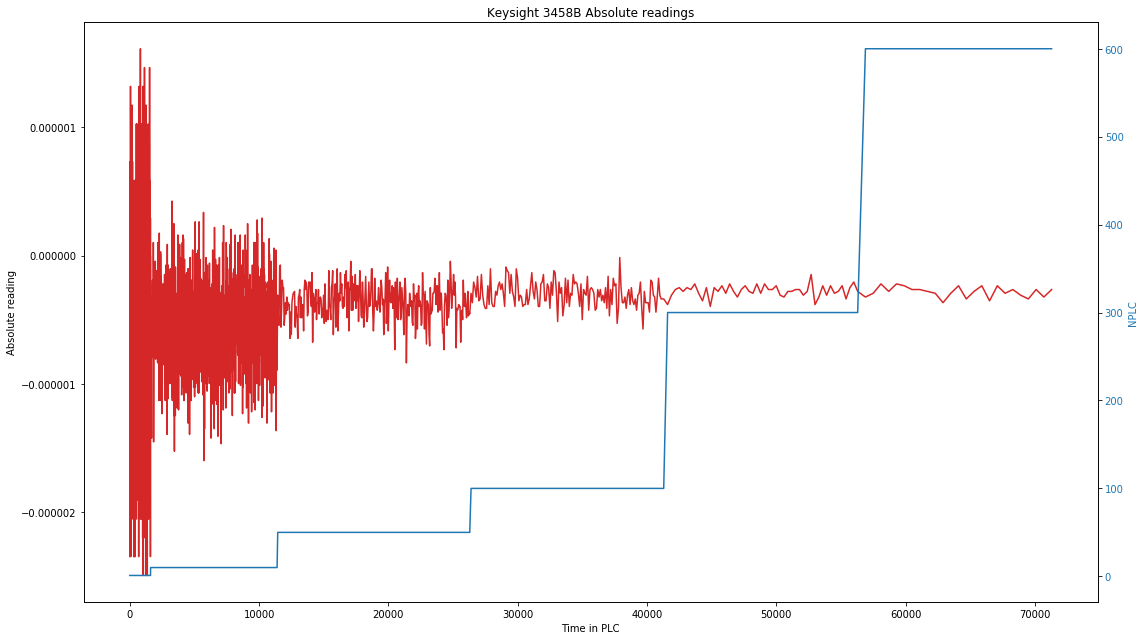


1 NPLC performance:
HP 3458A peak-peak = 4.271631e-06 V
HP 3458A DC offset = 3.861735e-08 V
HP 3458A RMS = 6.307539e-07 V

Keysight 3458B peak-peak = 4.104899e-06 V
Keysight 3458B DC offset = -6.357395e-07 V
Keysight 3458B RMS = 6.504089e-07 V


10 NPLC performance:
HP 3458A peak-peak = 1.649731e-06 V
HP 3458A DC offset = -3.138533e-08 V
HP 3458A RMS = 2.687226e-07 V

Keysight 3458B peak-peak = 2.023128e-06 V
Keysight 3458B DC offset = -5.403664e-07 V
Keysight 3458B RMS = 3.294595e-07 V


50 NPLC performance:
HP 3458A peak-peak = 5.891897e-07 V
HP 3458A DC offset = -1.172448e-07 V
HP 3458A RMS = 1.084813e-07 V

Keysight 3458B peak-peak = 7.916588e-07 V
Keysight 3458B DC offset = -3.646885e-07 V
Keysight 3458B RMS = 1.393662e-07 V


100 NPLC performance:
HP 3458A peak-peak = 3.387841e-07 V
HP 3458A DC offset = -1.209803e-07 V
HP 3458A RMS = 7.379756e-08 V

Keysight 3458B peak-peak = 5.570932e-07 V
Keysight 3458B DC offset = -2.981915e-07 V
Keysight 3458B RMS = 9.772828e-08 V


300 NPLC

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Array from .csv
arr=np.genfromtxt('https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/3458A_vs_B_noise.csv',delimiter=',',skip_header=1)

print("Lets get an overview.")
print(arr)

NPLC = [row[0] for row in arr]
HP3458A = [row[1] for row in arr]
K3458B = [row[2] for row in arr]

# Create an x-axis with roughly equal widths for all NPLC settings
x_axis = []
j=0
for i in range(len(NPLC)):
    j=j+NPLC[i]
    x_axis.append(j)

color = 'tab:green'
figa, axa1 = plt.subplots()
axa1.plot(x_axis, HP3458A, color=color)
axa1.set_xlabel('Time in PLC')
axa1.set_ylabel('Absolute reading', color=color)
axa1.set_title("HP 3458A Absolute readings")
axa1.tick_params(axis='y', labelcolor=color)
figa.set_size_inches(16, 9)

color = 'tab:blue'
axa2 = axa1.twinx() 
axa2.set_ylabel('NPLC', color=color)
axa2.plot(x_axis, NPLC, color=color)
axa2.tick_params(axis='y', labelcolor=color)
figa.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

color = 'tab:red'
figb, axb1 = plt.subplots()
axb1.plot(x_axis, K3458B, color=color)
axb1.set_xlabel('Time in PLC')
axb1.set_ylabel('Absolute reading')
axb1.set_title("Keysight 3458B Absolute readings")
figb.set_size_inches(16, 9)

color = 'tab:blue'
axb2 = axb1.twinx() 
axb2.set_ylabel('NPLC', color=color)
axb2.plot(x_axis, NPLC, color=color)
axb2.tick_params(axis='y', labelcolor=color)
figb.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

def process_RMS(nplc):
    HP3458A = nplc[:, 1] # grabs only the HP3458A column
    print('HP 3458A peak-peak = {:e} V'.format(np.amax(HP3458A)-np.amin(HP3458A)))
    dcOffset = np.mean(HP3458A)
    print('HP 3458A DC offset = {:e} V'.format(dcOffset))
    HP3458A = HP3458A - dcOffset # Normalize by removing DC offset
    HP3458A = np.square(HP3458A) # Square each sample
    rms = np.sum(HP3458A)/len(HP3458A) # Divide the sum of all samples by the number of samples
    rms = np.sqrt(rms) # Square root the result
    print('HP 3458A RMS = {:e} V\n'.format(rms))

    K3458B = nplc[:, 2]
    print('Keysight 3458B peak-peak = {:e} V'.format(np.amax(K3458B)-np.amin(K3458B)))
    dcOffset = np.mean(K3458B)
    print('Keysight 3458B DC offset = {:e} V'.format(dcOffset))
    K3458B = K3458B - dcOffset
    K3458B = np.square(K3458B)
    rms = np.sum(K3458B)/len(K3458B)
    rms = np.sqrt(rms)
    print('Keysight 3458B RMS = {:e} V\n'.format(rms))



print("\n1 NPLC performance:")
nplc1 = arr[arr[:,0]==1] # this brain-metler filters all NPLC but 1
process_RMS(nplc1)

print("\n10 NPLC performance:")
nplc10 = arr[arr[:,0]==10]
process_RMS(nplc10)

print("\n50 NPLC performance:")
nplc50 = arr[arr[:,0]==50]
process_RMS(nplc50)

print("\n100 NPLC performance:")
nplc100 = arr[arr[:,0]==100]
process_RMS(nplc100)

print("\n300 NPLC performance:")
nplc300 = arr[arr[:,0]==300]
process_RMS(nplc300)

print("\n600 NPLC performance:")
nplc600 = arr[arr[:,0]==600]
process_RMS(nplc600)